<a href="https://colab.research.google.com/github/alexander-toschev/ai-tools/blob/main/tensorflow/tensorflow_showcase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🔬 TensorFlow All-in-One Showcase
Демонстрация основных возможностей TensorFlow: от работы с тензорами до нейросетей, GPU и экспорта моделей.

In [11]:
# 📌 Установка и импорт
!conda install -c conda-forge tensorflow 


ERROR: The install method you used for conda--probably either `pip install conda`
or `easy_install conda`--is not compatible with using conda as an application.
If your intention is to install conda as a standalone application, currently
supported install methods include the Anaconda installer and the miniconda
installer.  You can download the miniconda installer from
https://conda.io/miniconda.html.



In [2]:
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 15.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 27.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 25.4 MB/s eta 0:00:00


In [3]:

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print("TensorFlow version:", tf.__version__)
print("GPU available:", tf.config.list_physical_devices('GPU'))

Matplotlib is building the font cache; this may take a moment.


TensorFlow version: 2.13.1
GPU available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


## 🔹 1. Работа с тензорами
Создание и базовые операции с тензорами: сложение, матричное умножение, поэлементное произведение.

In [2]:
# Создание тензоров
a = tf.constant([[1, 2], [3, 4]])
b = tf.constant([[5, 6], [7, 8]])

# Операции
print("Matrix sum:\n", tf.add(a, b))
print("Matrix product:\n", tf.matmul(a, b))
print("Element-wise multiplication:\n", tf.multiply(a, b))

Metal device set to: Apple M1 Max
Matrix sum:
 tf.Tensor(
[[ 6  8]
 [10 12]], shape=(2, 2), dtype=int32)
Matrix product:
 tf.Tensor(
[[19 22]
 [43 50]], shape=(2, 2), dtype=int32)
Element-wise multiplication:
 tf.Tensor(
[[ 5 12]
 [21 32]], shape=(2, 2), dtype=int32)


2025-04-07 16:55:49.999397: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-04-07 16:55:49.999839: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


## 🔹 2. Простая нейросеть (Keras API)
Создание, обучение и оценка модели на датасете MNIST с помощью `tf.keras`.

In [4]:
# Загружаем датасет MNIST
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0

# Создание модели
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Компиляция
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Обучение
model.fit(x_train, y_train, epochs=5)

# Оценка
model.evaluate(x_test, y_test)

2025-04-07 21:43:11.729035: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Max
2025-04-07 21:43:11.729110: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 32.00 GB
2025-04-07 21:43:11.729151: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 10.67 GB
2025-04-07 21:43:11.729243: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-04-07 21:43:11.729276: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 1/5


2025-04-07 21:43:12.834248: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 11s 5ms/step - loss: 0.4195 - accuracy: 0.8780
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3860 - accuracy: 0.8931
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4066 - accuracy: 0.8873
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4078 - accuracy: 0.8878
Epoch 5/5
 21/313 [=>............................] - ETA: 1s - loss: 0.2982 - accuracy: 0.9122

2025-04-07 21:43:55.754368: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 4ms/step - loss: 0.3033 - accuracy: 0.9171


[0.30331969261169434, 0.9171000123023987]

## 🔹 3. Кастомный training loop (GradientTape)
Полный контроль над forward и backward проходами с использованием `tf.GradientTape`.

In [20]:
# Простая модель и ручной цикл обучения
class SimpleModel(tf.keras.Model):
    def __init__(self,  **kwargs):
        super().__init__(**kwargs) # Pass extra arguments to superclass
        self.d1 = tf.keras.layers.Dense(64, activation='relu')
        self.out = tf.keras.layers.Dense(10)

    def call(self, x):
        x = self.d1(x)
        return self.out(x)

    def get_config(self):
        config = super().get_config()
        # No specific layer configurations to add here
        return config

    @classmethod
    def from_config(cls, config):
        return cls(**config)

model = SimpleModel()
optimizer = tf.keras.optimizers.Adam()
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

@tf.function
def train_step(x, y):
    with tf.GradientTape() as tape:
        logits = model(x)
        loss = loss_fn(y, logits)
    grads = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))
    return loss

# Обработка данных и обучение
x_batch = tf.convert_to_tensor(x_train[:128].reshape(-1, 28*28), dtype=tf.float32)
y_batch = tf.convert_to_tensor(y_train[:128], dtype=tf.int64)

for epoch in range(5):
    loss = train_step(x_batch, y_batch)
    print(f"Epoch {epoch + 1}, Loss: {loss.numpy():.4f}")

Epoch 1, Loss: 2.3871
Epoch 2, Loss: 2.2397
Epoch 3, Loss: 2.1056
Epoch 4, Loss: 1.9805
Epoch 5, Loss: 1.8640


## 🔹 4. Использование GPU
Выполнение матричных операций на доступном GPU.

In [18]:
# Проверим работу с GPU
with tf.device('/GPU:0'):
    a = tf.random.normal([1000, 1000])
    b = tf.random.normal([1000, 1000])
    c = tf.matmul(a, b)
print("Matrix multiplication done on GPU")

Matrix multiplication done on GPU


## 🔹 5. Сохранение и загрузка модели
Сохраняем модель в формате SavedModel и загружаем обратно.

In [28]:
# Сохраняем модель
model.save('my_model.keras')  # <-- без .h5

# Загружаем модель
new_model = tf.keras.models.load_model('my_model.keras', custom_objects={'SimpleModel': SimpleModel})
new_model.summary()

Model: "simple_model_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                     │ (128, 64)                   │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (128, 10)                   │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,890 (198.79 KB)

 Trainable params: 50,890 (198.79 KB)

 Non-trainable params: 0 (0.00 B)

## 🔹 6. Экспорт модели в TensorFlow Lite
Конвертация модели в формат TFLite для мобильных и edge-устройств.

In [31]:
# Конвертация в TFLite
model.export('my_model')  # <-- без .h5
converter = tf.lite.TFLiteConverter.from_saved_model('my_model')
tflite_model = converter.convert()

# Сохраняем в файл
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)
print("Model converted to TensorFlow Lite")

Saved artifact at 'my_model'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 784), dtype=tf.float32, name=None)
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  136856574258512: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136856574252752: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136856846723664: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136856574257360: TensorSpec(shape=(), dtype=tf.resource, name=None)
Model converted to TensorFlow Lite


## 🔹 7. Style Transfer (Перенос стиля)
Пример использования TensorFlow Hub для художественного переноса стиля изображения. Мы используем предобученную модель, чтобы стилизовать обычное изображение под картину.

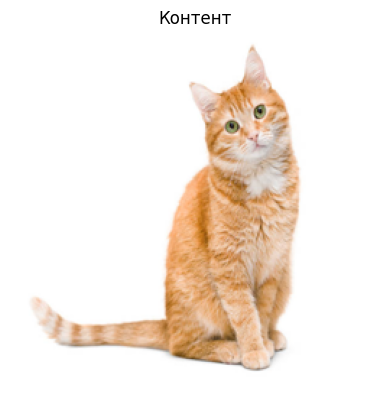

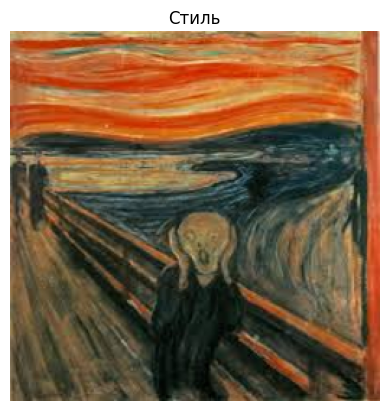

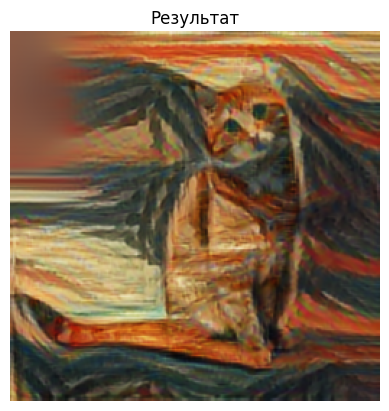

In [39]:

import tensorflow_hub as hub
import PIL.Image
import requests
from io import BytesIO

def load_image(url, resize_to=(256, 256)):
    """Loads an image from a URL, resizes it, and converts it to a TensorFlow tensor.

    Args:
        url: The URL of the image.
        resize_to: A tuple specifying the desired width and height of the resized image.

    Returns:
        A TensorFlow tensor representing the image.
    """
    # Use a try-except block to handle potential errors
    try:
        response = requests.get(url, stream=True)
        response.raise_for_status()  # Raise an exception for bad status codes
        image = PIL.Image.open(BytesIO(response.content)).convert('RGB')
        image = image.resize(resize_to)
        image = np.array(image) / 255.0
        return tf.constant(image, dtype=tf.float32)[tf.newaxis, ...]
    except (requests.exceptions.RequestException, PIL.UnidentifiedImageError) as e:
        print(f"Error loading image from {url}: {e}")
        return None


# Загружаем контент и стиль
content_image = load_image("https://github.com/alexander-toschev/ai-tools/blob/main/data/cat.jpg?raw=true")
style_image = load_image("https://github.com/alexander-toschev/ai-tools/blob/main/data/style.jpg?raw=true")

# Загружаем модель переноса стиля
hub_model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

# Применяем стиль
stylized_image = hub_model(tf.constant(content_image), tf.constant(style_image))[0]

# Показываем результат
def show_image(image, title=''):
    plt.imshow(image[0])
    plt.axis('off')
    plt.title(title)
    plt.show()

show_image(content_image, 'Контент')
show_image(style_image, 'Стиль')
show_image(stylized_image, 'Результат')
